<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="10%" align="right" border="0"><br>

# Python for Finance

**Analyze Big Financial Data**

O'Reilly (2014)

Yves Hilpisch

<img style="border:0px solid grey;" src="http://hilpisch.com/python_for_finance.png" alt="Python for Finance" width="10%" align="left" border="0">

**Buy the book ** |
<a href='http://shop.oreilly.com/product/0636920032441.do' target='_blank'>O'Reilly</a> |
<a href='http://www.amazon.com/Yves-Hilpisch/e/B00JCYHHJM' target='_blank'>Amazon</a>

**All book codes & IPYNBs** |
<a href="http://oreilly.quant-platform.com">http://oreilly.quant-platform.com</a>

**The Python Quants GmbH** | <a href='http://tpq.io' target='_blank'>http://tpq.io</a>

**Contact us** | <a href='mailto:pff@tpq.io'>pff@tpq.io</a>

# Mathematical Tools(数学工具)

In [2]:
from pylab import plt
plt.style.use('ggplot')
import matplotlib as mpl
mpl.rcParams['font.family'] = 'serif'

## 1 Approximation(逼近法)

In [45]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
def f(x):
    return np.sin(x) + 0.5 * x

In [47]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

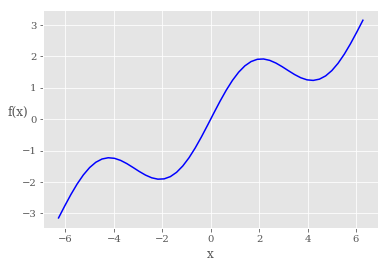

In [48]:
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)',rotation = 0)
# tag: sin_plot
# title: Example function plot
# size: 60

### 1.1 Regression(回归)
回归是相当高效的函数近似计算工具。它不仅适合求取一维函数的近似值，在更高维度上也很有效。

本质上，回归的任务是在给定一组所谓的“基函数”$b_d,  d\in \{1, \cdots, D\}$的情况下，根据公式1-1找出最优参数$\alpha_1^*, \cdots, \alpha_D^*$,其中对于$i \in \{1, \cdots, I\}$观察点，$y_i \equiv f(x_i)$.

公式1-1：最小化回归问题
$$\min_{\alpha_1, \cdots, \alpha_D} \frac{1}{I} \sum_{i=1}^{I}\left(y_i - \sum_{d=1}^{D}\alpha_d \cdot b_d(x_i)\right)^2$$

转化为矩阵形式：

$$I = len(x)$$
$$x = np.array(x_1, \cdots, x_I)$$ 
$$y = np.array(y_i, \cdots, y_I)$$
$$b = np.array(b_1, \cdots, b_D)$$

$$\rho = np.array(\alpha_1^*, \cdots, \alpha_D^*) = \min_A  \frac{1}{I} \|y - A \cdot b(x)  \|_2^2$$


#### Monomials as Basis Functions(作为基函数的单项式)

即 $b_1 = 1, b_2 = x, b_3 = x^2, b_4 = x^3, \cdots$

NumPy有确定最优参数(`ployfit`)和以一组输入值求取近似值(`polyval`)的内建函数。

在`ployfit`返回的最优回归相关系数$\rho$基础上，np.polyval($\rho$, x)返回$x$坐标的回归值。

ployfit函数数参数：

参数|描述
:-:|:-
`x`|`x`坐标(自变量值)
`y`|`y`坐标(因变量值)
`deg`|多项式拟合度
`full`|若为真，返回额外的诊断信息
`w`|应用到`y`坐标的权重
`cov`|若为真，返回协方差矩阵

In [49]:
reg = np.polyfit(x, f(x), deg=1)
ry = np.polyval(reg, x)

In [73]:
np.polyfit?

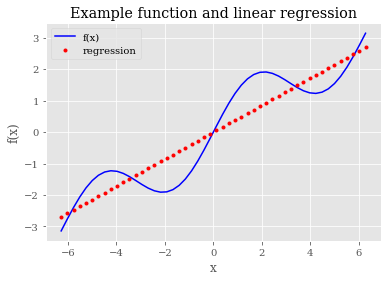

In [50]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_1
plt.title('Example function and linear regression')
# size: 60

In [51]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

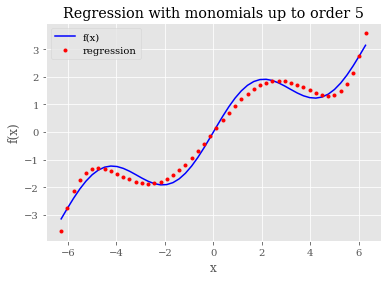

In [52]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_2
plt.title('Regression with monomials up to order 5')
# size: 60

In [53]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)

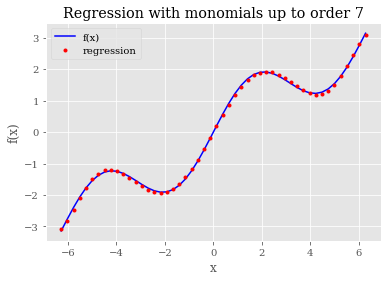

In [59]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_3
plt.title('Regression with monomials up to order 7')
# size: 60

In [60]:
np.allclose(f(x), ry)

False

均方差(MSE):

In [61]:
np.sum((f(x) - ry) ** 2) / len(x)

0.0017769134759517628

#### Individual Basis Functions(单独的基函数)
此时，必须使用NumPy ndarray对象

In [62]:
m = np.zeros((3 + 1, len(x)))    # 初始化
# 
m[3, :] = x ** 3
m[2, :] = x ** 2
m[1, :] = x
m[0, :] = 1

numpy.linalg子库提供**lstsq**函数，以解决和公式1-1类似的最小二乘优化问题：

In [63]:
np.linalg.lstsq(m.T, f(x))

(array([  1.13227125e-16,   5.62777448e-01,   4.44089210e-16,
         -5.43553615e-03]),
 array([ 18.70019638]),
 4,
 array([ 703.78757296,  130.00970131,   10.44694523,    4.7085911 ]))

In [64]:
reg = np.linalg.lstsq(m.T, f(x))[0]   # 返回

In [65]:
ry = np.dot(reg, m)

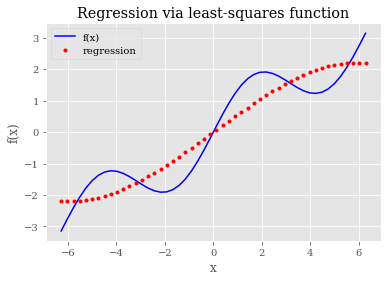

In [66]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_4
plt.title('Regression via least-squares function')
# size: 60

In [67]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)

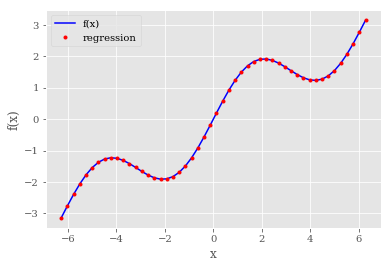

In [68]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_5
# title: Regression using individual functions
# size: 60

In [69]:
np.allclose(f(x), ry)

True

In [70]:
np.sum((f(x) - ry) ** 2) / len(x)

8.6444980367832195e-31

In [71]:
reg

array([  3.73659739e-16,   5.00000000e-01,   0.00000000e+00,
         1.00000000e+00])

#### Noisy Data(有噪声的数据)

In [74]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

In [75]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

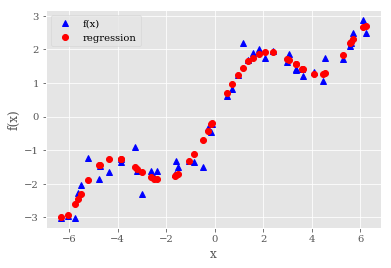

In [76]:
plt.plot(xn, yn, 'b^', label='f(x)')
plt.plot(xn, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_6
# title: Regression with noisy data
# size: 60

#### Unsorted Data(未排序的数据)

In [77]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
yu = f(xu)

In [78]:
print(xu[:10].round(2))
print(yu[:10].round(2))

[ 3.5  -1.57 -2.01 -0.44  3.32  0.11 -2.18  0.11  1.73 -6.17]
[ 1.4  -1.79 -1.91 -0.64  1.48  0.16 -1.91  0.17  1.85 -2.97]


In [79]:
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)

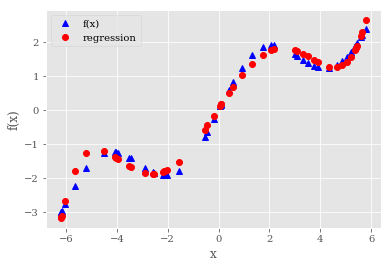

In [80]:
plt.plot(xu, yu, 'b^', label='f(x)')
plt.plot(xu, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_reg_7
# title: Regression with unsorted data
# size: 60

#### Multiple Dimensions(多维)

In [81]:
def fm(p):
    x, y = p
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [82]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)
  # generates 2-d grids out of the 1-d arrays
Z = fm((X, Y))
x = X.flatten()
y = Y.flatten()
  # yields 1-d arrays from the 2-d grids

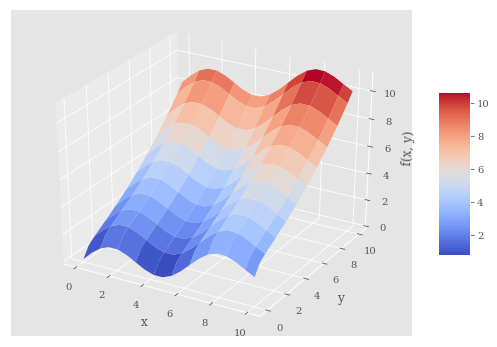

In [83]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
        linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
# tag: sin_plot_3d_1
# title: Function with two parameters
# size: 60

In [84]:
# 基函数
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

**statsmodels**库提供了**OLS**函数，可以用于一维和多维最小二乘回归：

OLS的使用详见<http://bit.ly/using_ols>

In [85]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [86]:
model = sm.OLS(fm((x, y)), matrix).fit()

OLS函数的好处之一提供关于回归及其质量的大量附加信息。调用`model.summary`可以访问结果的一个摘要。单独统计数字(如确定系数)通常可以直接访问：

In [87]:
model.rsquared

1.0

最优回归参数保存在model对象的`params`属性中：

In [88]:
a = model.params
a

array([ -4.16333634e-16,   2.50000000e-01,   4.02455846e-16,
        -4.85722573e-16,   5.00000000e-02,   1.00000000e+00,
         1.00000000e+00])

`reg_func`函数返回给定最优回归参数和自变量数据点的回归函数值：

In [89]:
def reg_func(a, p):
    x, y = p
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return (f6 + f5 + f4 + f3 +
            f2 + f1 + f0)

然后，将这些值与示例函数原始构成比较：

In [90]:
RZ = reg_func(a, (X, Y))

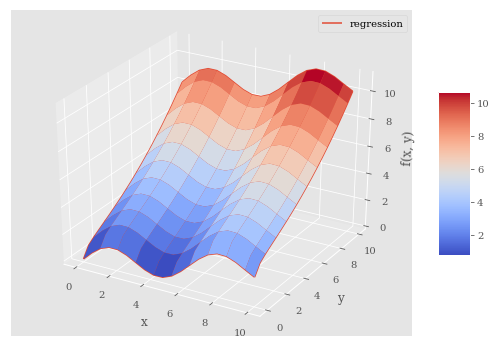

In [91]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2,
            cmap=mpl.cm.coolwarm, linewidth=0.5,
            antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2,
                          label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)
# tag: sin_plot_3d_2
# title: Higher dimension regression
# size: 60

### Interpolation(插值)

样条插值：
- 仅适用于有排序且无噪声的数据。    
- 仅限于低维问题。

基本思路：给定一组有序的观测点(按照x轴排序)，在两个相邻的数据点之间进行回归，不仅产生的分段插值函数完全匹配数据点，而且函数在数据点上连续可微分。

In [93]:
import scipy.interpolate as spi

In [94]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [95]:
def f(x):
    return np.sin(x) + 0.5 * x

在给定以x排序的数据点集时，应用这种方法和`polyfit`、`polyval`一样简单，此时对应的函数为`splrep`、`splev`.

In [100]:
ipo = spi.splrep(x, f(x), k=1)

In [101]:
iy = spi.splev(x, ipo)

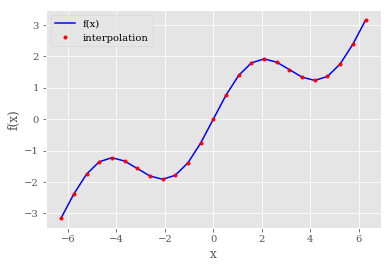

In [102]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_ipo_1
# title: Example plot with linear interpolation
# size: 60

In [103]:
np.allclose(f(x), iy)

True

In [104]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

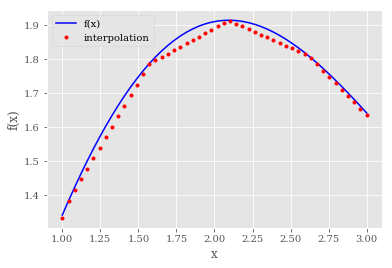

In [105]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_ipo_2
# title: Example plot (detail) with linear interpolation
# size: 60

In [106]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

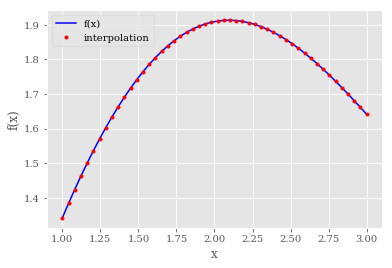

In [107]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')
# tag: sin_plot_ipo_3
# title: Example plot (detail) with cubic splines interpolation
# size: 60

In [108]:
np.allclose(f(xd), iyd)

False

In [109]:
np.sum((f(xd) - iyd) ** 2) / len(xd)

1.1349319851436252e-08

## 2 Convex Optimization(凸优化)

In [116]:
def fm(p):
    x, y = p
    return (np.sin(x) + 0.05 * x ** 2
          + np.sin(y) + 0.05 * y ** 2)

In [117]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

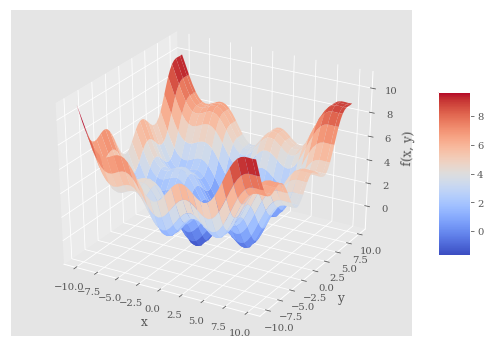

In [118]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm,
        linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
# tag: opt_plot_3d
# title: Function to minimize with two parameters
# size: 60

从图中可以看出，此函数有多个局部最小值。

In [110]:
import scipy.optimize as spo

### Global Optimization(全局最优)

为了更仔细的观察初始化最小过程时后台发生的情况，我们改善原函数，通过一个选项输出当前参数值和函数值。

In [119]:
def fo(p):
    x, y = p
    z = np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2
    if output == True:
        print('%8.4f %8.4f %8.4f' % (x, y, z))
    return z

`brute`以参数范围作为输入，返回最优化参数x, y 的值:

In [120]:
output = True
spo.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)

-10.0000 -10.0000  11.0880
-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([ 0.,  0.])

In [125]:
output = False
opt1 = spo.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)
opt1

array([-1.4, -1.4])

In [126]:
fm(opt1)   # 全局最优解

-1.7748994599769203

### Local Optimization(局部优化)
`fmin`函数的输入是需要最小化的函数和起始参数值，此外还可以定义输入参数宽容度和函数值宽容度，以及最大迭代和函数调用次数：

In [128]:
output = True
opt2 = spo.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
opt2

 -1.4000  -1.4000  -1.7749
 -1.4700  -1.4000  -1.7743
 -1.4000  -1.4700  -1.7743
 -1.3300  -1.4700  -1.7696
 -1.4350  -1.4175  -1.7756
 -1.4350  -1.3475  -1.7722
 -1.4088  -1.4394  -1.7755
 -1.4438  -1.4569  -1.7751
 -1.4328  -1.4427  -1.7756
 -1.4591  -1.4208  -1.7752
 -1.4213  -1.4347  -1.7757
 -1.4235  -1.4096  -1.7755
 -1.4305  -1.4344  -1.7757
 -1.4168  -1.4516  -1.7753
 -1.4305  -1.4260  -1.7757
 -1.4396  -1.4257  -1.7756
 -1.4259  -1.4325  -1.7757
 -1.4259  -1.4241  -1.7757
 -1.4304  -1.4177  -1.7757
 -1.4270  -1.4288  -1.7757


array([-1.42702972, -1.42876755])

In [129]:
fm(opt2)

-1.7757246992239009

下面陷入了“盆地跳跃(basin hopping)”

In [130]:
output = False
spo.fmin(fo, (2.0, 2.0), maxiter=250)

Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([ 4.2710728 ,  4.27106945])

### Constrained Optimization(有约束优化)

$$\min_{s,b} -\left(0.5 \cdot \sqrt{s \cdot 15 + b \cdot 5} + 0.5 \cdot \sqrt{s \cdot 5 + b \cdot 12}\right)$$
$$ 100 - s * 10 - b * 10 \geq 0$$
$$s, t \geq 0$$

In [131]:
# function to be minimized
from math import sqrt
def Eu(p):
    s, b = p
    return -(0.5 * sqrt(s * 15 + b * 5) + 0.5 * sqrt(s * 5 + b * 12))

# constraints(约束条件)
cons = ({'type': 'ineq', 'fun': lambda p:  100 - p[0] * 10 - p[1] * 10})
  # budget constraint
bnds = ((0, 1000), (0, 1000))  # uppper bounds large enough

In [132]:
result = spo.minimize(Eu, [5, 5], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [133]:
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully.'
    nfev: 21
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([ 8.02547122,  1.97452878])

`minimize`函数输入需要最小化的函数，参数范围，返回一个字典对象，最优参数可由 `result['x']`读出：

In [134]:
result['x']

array([ 8.02547122,  1.97452878])

最优函数值可用`result['fun']`读出：

In [135]:
-result['fun']

9.700883611487832

In [136]:
np.dot(result['x'], [10, 10])

99.999999999999986

## 3 Integration(积分)

scipy.integrate函数提供数值积分所用函数：

In [138]:
import scipy.integrate as sci

求解$\int_{0.5}^{9.5}{sin(x) + 0.5 x} {\rm d}x$

In [141]:
def f(x):
    return np.sin(x) + 0.5 * x

In [142]:
a = 0.5  # left integral limit
b = 9.5  # right integral limit
x = np.linspace(0, 10)
y = f(x)

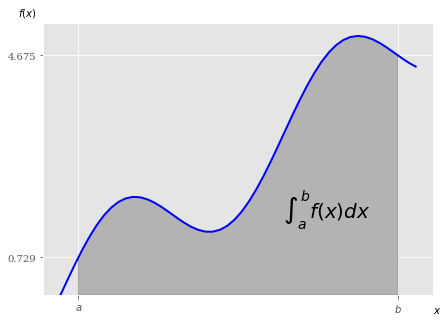

In [143]:
from matplotlib.patches import Polygon

fig, ax = plt.subplots(figsize=(7, 5))
plt.plot(x, y, 'b', linewidth=2)
plt.ylim(ymin=0)

# area under the function
# between lower and upper limit
Ix = np.linspace(a, b)
Iy = f(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

# labels
plt.text(0.75 * (a + b), 1.5, r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)])
# tag: sin_integral
# title: Example function with integral area
# size: 50

### Numerical Integration(数值积分)

##### 给定上下限

In [144]:
sci.fixed_quad(f, a, b)[0]  # 固定高斯求积

24.366995967084602

In [145]:
sci.quad(f, a, b)[0]   # 自适应求积

24.374754718086752

In [146]:
sci.romberg(f, a, b)   # 勒贝格积分

24.374754718086713

##### 以列表或者包含函数值的ndarray对象作为输入：

In [147]:
xi = np.linspace(0.5, 9.5, 25)

In [148]:
sci.trapz(f(xi), xi)     # 使用梯形法则

24.352733271544516

In [149]:
sci.simps(f(xi), xi)     # 使用辛普森法则

24.374964184550748

### Integration by Simulation(通过蒙特卡洛模拟求取积分)

In [151]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a
    print(np.sum(f(x)) / len(x) * (b - a))

24.8047622793
26.5229188983
26.2655475192
26.0277033994
24.9995418144
23.8818101416
23.5279122748
23.507857659
23.6723674607
23.6794104161
24.4244017079
24.2390053468
24.115396925
24.4241919876
23.9249330805
24.1948421203
24.1173483782
24.1006909297
23.7690510985


## 4 Symbolic Computation(符号计算)

In [152]:
import sympy as sy

### Basics(基本知识)

**Sympy**引入了新的对象类。最基本的是**Symbol**类：

In [153]:
x = sy.Symbol('x')
y = sy.Symbol('y')

In [154]:
type(x)

sympy.core.symbol.Symbol

和NumPy一样，Sympy由一些（数学）函数定义：

In [156]:
sy.sqrt(x)

sqrt(x)

尽管 x 没有数字值，但是Sympy已经定义了 x 的平方根，这是因为 x 是一个符号(Sympy)对象。在这个意义上，`sy.sqrt(x)`可以成为任何数学表达式的一部分。且Sympy通常自动简化给定的数学表达式：

In [157]:
3 + sy.sqrt(x) - 4 ** 2

sqrt(x) - 13

类似的，可以使用符号对象定义任何函数。它们不会与*Python*函数混淆。

In [158]:
f = x ** 2 + 3 + 0.5 * x ** 2 + 3 / 2

In [159]:
sy.simplify(f)

1.5*x**2 + 4.5

Sympy为数学表达式提供了3个基本的渲染器：        
1. 基于LaTex的渲染器
2. 基于unicode的渲染器
3. 基于ASCII的渲染器

In [166]:
sy.init_printing(pretty_print=False, use_unicode=False)

In [167]:
print(sy.pretty(f))

     2      
1.5*x  + 4.5


In [168]:
print(sy.pretty(sy.sqrt(x) + 0.5))

  ___      
\/ x  + 0.5


In [169]:
pi_str = str(sy.N(sy.pi, 400000))
pi_str[:40]

'3.14159265358979323846264338327950288419'

In [170]:
pi_str[-40:]

'8245672736856312185020980470362464176198'

In [171]:
pi_str.find('111272')  # 查找你的生日

366713

### Equations(方程式)

解方程$x^2 - 1 = 0$：

In [173]:
sy.solve(x ** 2 - 1)

[-1, 1]

一般来说，SymPy假定你寻找的是使指定表达式为0的方程的解。    
例如，求解$x^2 - 1 = 3$,需要如下操作：

In [175]:
sy.solve(x ** 2 - 1 - 3)

[-2, 2]

In [176]:
sy.solve(x ** 3 + 0.5 * x ** 2 - 1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [177]:
sy.solve(x ** 2 + y ** 2)

[{x: -I*y}, {x: I*y}]

### Integration(积分)

In [178]:
a, b = sy.symbols('a b')

In [179]:
print(sy.pretty(sy.Integral(sy.sin(x) + 0.5 * x, (x, a, b))))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      


通过**integrate**函数可以得出积分的反导数（不定积分）：

In [180]:
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)

In [181]:
print(sy.pretty(int_func))

      2         
0.25*x  - cos(x)


有了不定积分，求积分只需要三步：   
1. 求取SymPy表达式的值
2. 使用方法`subs`将数值代入对应的符号
3. 在新的表达式上调用方法`evalf`

In [182]:
Fb = int_func.subs(x, 9.5).evalf()
Fa = int_func.subs(x, 0.5).evalf()

In [183]:
Fb - Fa  # exact value of integral(积分的准确值)

24.3747547180867

积分也可以用符号积分的上下限得到符号解：

In [184]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x, (x, a, b))
print(sy.pretty(int_func_limits))

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


代入数值，使用字典对象代表多个替代值，并求值可以得到积分值：

In [185]:
int_func_limits.subs({a : 0.5, b : 9.5}).evalf()

24.3747547180868

提供量化的积分上下限，进一步得出准确值：

In [186]:
sy.integrate(sy.sin(x) + 0.5 * x, (x, 0.5, 9.5))

24.3747547180867

### Differentiation(微分)

In [110]:
int_func.diff()

0.5*x + sin(x)

In [187]:
f = (sy.sin(x) + 0.05 * x ** 2
   + sy.sin(y) + 0.05 * y ** 2)

为了最小化`f`，我们需要两个变量的偏微分：

In [112]:
del_x = sy.diff(f, x) 
del_x

0.1*x + cos(x)

In [113]:
del_y = sy.diff(f, y)
del_y

0.1*y + cos(y)

In [114]:
xo = sy.nsolve(del_x, -1.5)
xo

-1.42755177876459

In [115]:
yo = sy.nsolve(del_y, -1.5)
yo

-1.42755177876459

In [116]:
f.subs({x : xo, y : yo}).evalf() 
  # global minimum

-1.77572565314742

In [117]:
xo = sy.nsolve(del_x, 1.5)
xo

1.74632928225285

In [118]:
yo = sy.nsolve(del_y, 1.5)
yo

1.74632928225285

In [119]:
f.subs({x : xo, y : yo}).evalf()
  # local minimum

2.27423381055640

## 延伸阅读：  

+ NumPy的函数库：<http://docs.scipy.org!doc/numpy/reference/>
+ statsmodels 库: <http://statsmodels.sourceforge.net>
- scipy.optimize 的细节可以访问 <http:docs.scipy.org!d∞:/scipy/reference/optimize.html>
+ scipy.integrate 的积分运算在这里可以找到解释: <http://docs.scipy.org!doc/scipy/reference/integrate.html>